<a href="https://colab.research.google.com/github/finfrierson/data-science-fundamentals/blob/main/Fin_FrieU4proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm
import arviz as az

#Starting

Most of this section is reading, explaining, and categorizing data, trying to get an initial grasp of what the data is like and making it more useable.

In [ ]:
url="https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv"
bb_data = pd.read_csv(url)

THis data is from the 2023-2024 basketball season. I wil categorize it through player position, and judge players by their TRB position.

In [ ]:
bb_data

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Precious Achiuwa,PF-C,24,TOT,74,18,1624,235,469,0.501,...,191,296,487,97,46,68,83,143,565,achiupr01
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,439,65,108,0.602,...,46,57,103,57,23,5,15,49,137,youngth01
568,Trae Young,PG,25,ATL,54,54,1942,433,1008,0.430,...,23,126,149,583,72,11,235,109,1389,youngtr01
569,Omer Yurtseven,C,25,UTA,48,12,545,99,184,0.538,...,72,136,208,29,8,18,37,52,222,yurtsom01
570,Cody Zeller,C,31,NOP,43,0,320,26,62,0.419,...,48,64,112,39,9,5,16,45,76,zelleco01


In [ ]:
#Getting Data categorized
pos_encode = pd.Categorical(bb_data['Pos'])
pos_idx = pos_encode.codes
pos_coords = {"Pos": pos_encode.categories}

In [ ]:
pos_idx

array([ 3,  0, 10,  2, 10, 10,  0,  7,  5,  2,  2,  2,  5,  7,  5,  7,  0,
        0,  0,  0,  5,  7,  5,  0,  2, 10,  5,  2,  2, 10, 10,  0,  7,  7,
        2,  2, 10, 10,  7, 10,  2,  5,  7,  0, 10,  0,  5,  7,  7, 10,  8,
        2,  0,  5,  7,  2, 10,  5,  5, 10,  7,  7,  7,  5,  5,  5,  7,  6,
       10,  2,  7, 10,  2,  0,  7,  5,  0, 10,  7, 10, 10,  2,  2, 10,  2,
        0,  5,  0, 10, 10,  0, 10,  7,  7, 10,  7,  2, 10,  0,  2,  7,  2,
        0,  5,  7,  7, 10,  8,  7,  2,  5,  5, 10,  5,  5,  0, 10, 10, 10,
        7,  0,  2, 10, 10,  2,  5, 10,  5,  7, 10,  5,  7,  0,  7, 10,  5,
        2,  0,  2, 10,  7, 10,  0,  0,  7,  5,  0,  2, 10,  5,  7,  5, 10,
       10,  5,  5,  7,  5, 10,  2,  1,  4,  5,  2,  0,  7,  5,  2,  2, 10,
        0,  5,  2,  5,  5,  0,  5,  2, 10,  5,  2,  2, 10, 10,  2, 10,  7,
        2, 10,  7, 10,  2,  2,  2,  5,  5,  5,  7,  5, 10,  2, 10, 10, 10,
        2, 10,  7,  0,  7, 10,  0,  5,  7,  5,  2, 10,  9,  2, 10, 10,  5,
        5, 10,  1,  0, 10

(array([245., 131.,  95.,  51.,  21.,  13.,   8.,   4.,   3.,   1.]),
 array([   0.,  112.,  224.,  336.,  448.,  560.,  672.,  784.,  896.,
        1008., 1120.]),
 <BarContainer object of 10 artists>)

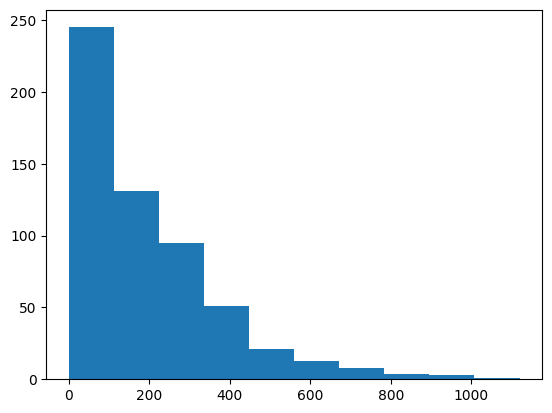

In [ ]:
#Overall rebounds modeled as a histogram to get an idea of the shape
plt.hist(bb_data['TRB'])

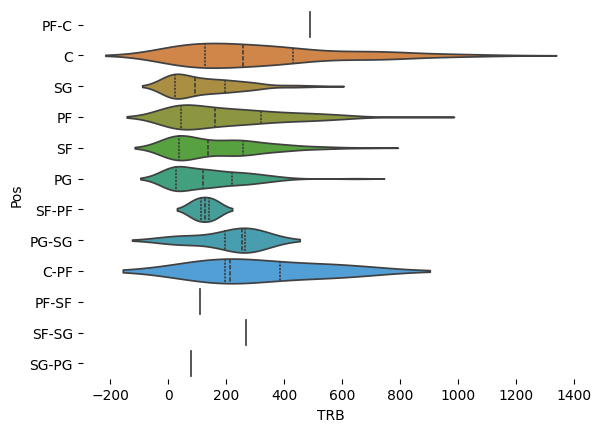

In [ ]:
#A violin plot of the same data, to see a more specific concentratio of scores based on the positions.
sns.violinplot(bb_data, x='TRB', y='Pos', inner='quart',hue='Pos')
sns.despine(top=True, right=True, bottom=True, left=True)

#Model Attempt 1

I felt really lost with my first model so I tried a student T model and did not do any type of removal of categories

In [ ]:
with pm.Model(coords=pos_coords) as bb_h_model:
    # hyperpriors
    ν_nu = pm.StudentT('ν_mu', nu = 4.5, mu = 12.5, sigma = 1)
    ν_sd = pm.HalfStudentT('ν_sd', nu = 20, sigma = 1)

    # priors
    ν = pm.HalfStudentT('ν',
                  nu = ν_nu,
                  sigma = ν_sd,
                  dims = "Pos")
    μ = pm.StudentT(
        'μ',
        nu = 4.5,
        mu = 12.5,
        sigma = 1,
        dims = "Pos")
    σ = pm.StudentT('σ',
                  nu = 4.5,
                  mu = 12.5,
                  sigma = 1,
                  dims = "Pos")

    #likelihood
    y = pm.StudentT('y',
                  nu = ν[pos_idx],
                  mu =  μ[pos_idx],
                  sigma = σ[pos_idx],
                  observed = bb_data['TRB'])

    idata_bb_h = pm.sample()

Output()

Output()

ERROR:pymc.stats.convergence:There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


In [ ]:
#Posterior sampling then checking first as I feel off about this model
pm.sample_posterior_predictive(idata_bb_h, model=bb_h_model, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:250: RuntimeWarning: divide by zero encountered in scalar power
  out = t - (2 * N * np.pi**0.5 * f) ** (-0.4)


<Axes: xlabel='y'>

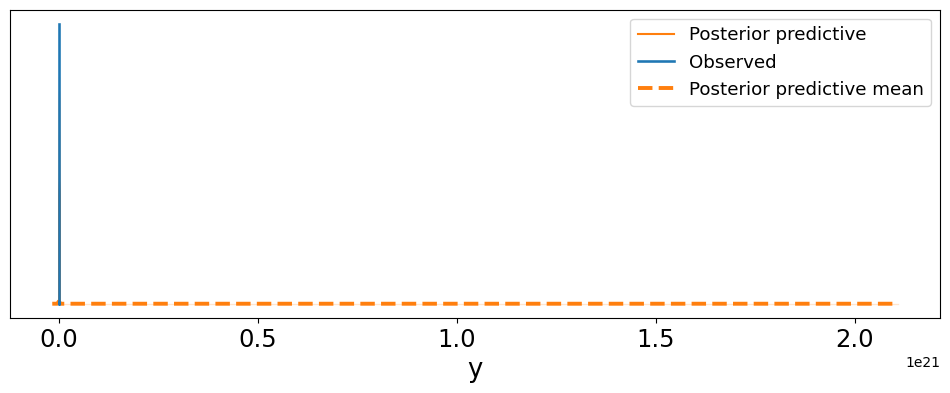

In [ ]:
az.plot_ppc(idata_bb_h, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

This model appears to have something quite seriously wrong with it, as it appearsto not run properly at all, and I was not confident about my extimations for the values in the priors and hyperpriors, So next I will move on and try a Normal distribution to simplify the model and have data accurate to the trend of most values being between 0 and 250

#Model attempt 2

In [ ]:
with pm.Model(coords = pos_coords) as bb_model2:
  #hyperprior
    σ_mu = pm.Normal('ν_mu', mu = 800, sigma = 640)
    σ_sm = pm.HalfNormal('ν_sd', sigma = 800)
#prior
    σ = pm.Normal('σ', mu=σ_mu, sigma=σ_sm, dims ="Pos")
    μ = pm.Normal('μ', mu=320, sigma = 160, dims = 'Pos')
#likelihood
    y=pm.Normal('y', mu=μ[pos_idx], sigma = σ[pos_idx], observed = bb_data['TRB'])
    sample = pm.sample()

Output()

Output()

ERROR:pymc.stats.convergence:There were 355 divergences after tuning. Increase `target_accept` or reparameterize.


In [ ]:
az.rhat(sample)

<xarray.Dataset> Size: 448B
Dimensions:  (Pos: 12)
Coordinates:
  * Pos      (Pos) <U5 240B 'C' 'C-PF' 'PF' 'PF-C' ... 'SF-SG' 'SG' 'SG-PG'
Data variables:
    μ        (Pos) float64 96B 1.002 1.001 1.002 1.002 ... 1.003 1.009 1.001
    ν_mu     float64 8B 1.003
    ν_sd     float64 8B 1.005
    σ        (Pos) float64 96B 1.002 1.005 1.003 1.001 ... 1.001 1.001 1.003

These Rhat values are not tooooo bad, so Ill try to fix it up in  a new model a bit more but its getting closer.

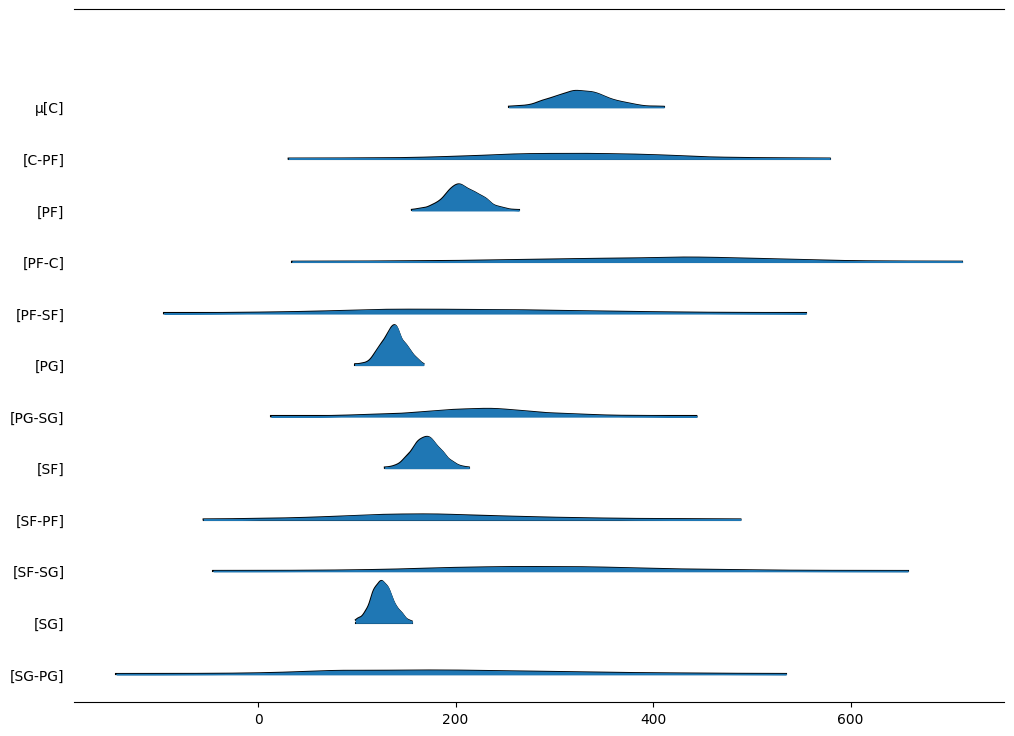

In [ ]:
#A quic check of the means to see if the values are decent
axes = az.plot_forest(sample, kind="ridgeplot",
                      var_names='μ',
                      combined=True, figsize=(12, 9), hdi_prob=0.997)

The means plotted here do match what I want for the mos4t part, but some of them are skewed too far to the right. This leads me to think maybe a Half student t model could do a better job of allowing lower means.

In [ ]:
#sampling posteriors here then checking it next
pm.sample_posterior_predictive(sample, model=bb_model2, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='y'>

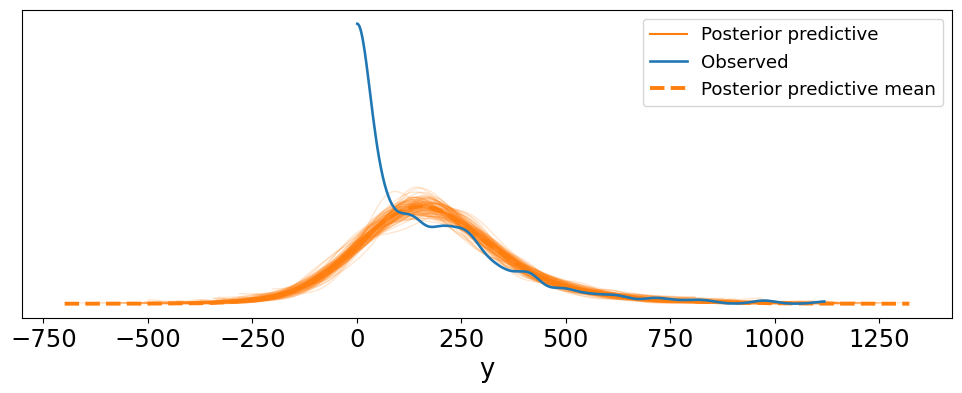

In [ ]:
az.plot_ppc(sample, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

From the ppc I can tell that the begining behavior is not modeled as well as I would like, and the model has a little too high of values from 100 to 400. I will next try a half normal model.

#Model Attempt 3

In [ ]:
with pm.Model(coords = pos_coords) as bb_model3:
  #hyperprior
    σ_mu = pm.Normal('ν_mu', mu = 400, sigma = 320)
    σ_sm = pm.HalfNormal('ν_sd', sigma = 400)
#prior
    σ = pm.Normal('σ', mu=σ_mu, sigma=σ_sm, dims ="Pos")
#likelihood
    y=pm.HalfNormal('y', sigma = σ[pos_idx], observed = bb_data['TRB'])
    data = pm.sample()

Output()

Output()

ERROR:pymc.stats.convergence:There were 64 divergences after tuning. Increase `target_accept` or reparameterize.


With a half normal likelihood, I decided I wanted a normal prior to keep my sigma values all relatively similar. For the hyperpriors, for simplicity and accuracy I went for a normal and a half normal distribution, with the normal distribution controlling mu, to have values that start at a specific vale but can branch out a good ammount, and the half normal controlling the sigma values to keep the standard deviation of the model relatively small and consistant.

In [ ]:
az.rhat(data)

<xarray.Dataset> Size: 352B
Dimensions:  (Pos: 12)
Coordinates:
  * Pos      (Pos) <U5 240B 'C' 'C-PF' 'PF' 'PF-C' ... 'SF-SG' 'SG' 'SG-PG'
Data variables:
    ν_mu     float64 8B 1.001
    ν_sd     float64 8B 1.0
    σ        (Pos) float64 96B 1.002 1.0 0.9997 1.001 ... 1.001 1.0 1.0 1.001

These R hat values are quite good, but I think I could do a bit better. This does approach what I want more than the normal model or the studentt model.

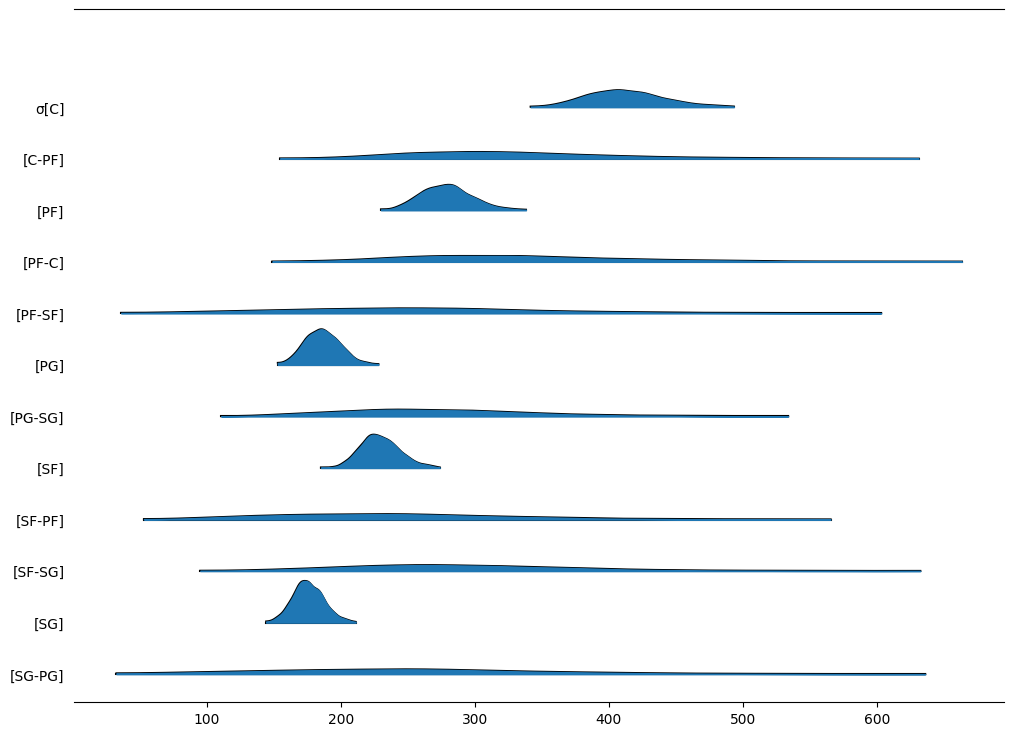

In [ ]:
#Plotting sigma vales to get a first estimate on how the graph will look/do
axes = az.plot_forest(data, kind="ridgeplot",
                      var_names='σ',
                      combined=True, figsize=(12, 9), hdi_prob=0.997)

In [ ]:
#posterior predictive sampling, then check after
pm.sample_posterior_predictive(data, model=bb_model3, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='y'>

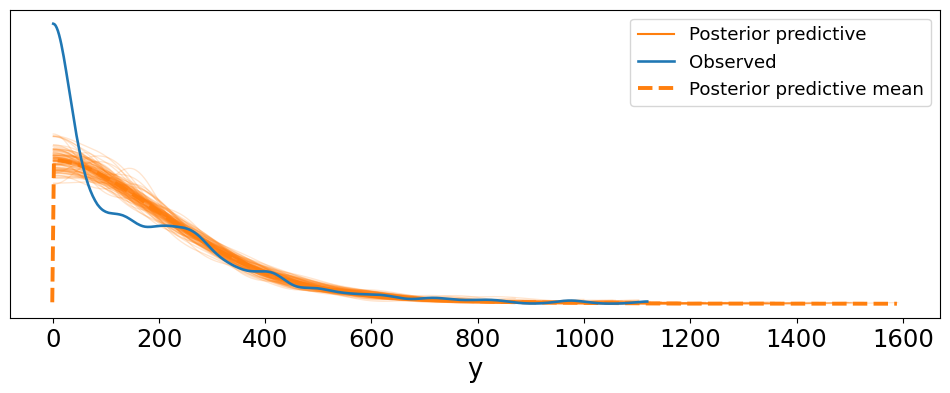

In [ ]:
az.plot_ppc(data, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

The concentration of scores matches best above 200, was alright from 50 to 150, but was very innacurate before 50.

#Conclusion

My best model, the half normal, ended up having reasonable r hat values, but did not fuly match the starting behavior. I made an attempt at making a lognormal model and an exponential model to try to fix that but neither worked remotely well, or was ful of errors. I could probably work around those given more time, or try removing certain positions from the model, but this model I am satisfied with. If I were to remove certain player positions my half normal model would fit quite well,as there would be less scores right at 0, which are mostly from positions whos purpose is not to have high TRBs. My model shows that overall most players have a TRB between 0 and 250 with a normal distribution of scores beyond that, making scores above 1100 extremely rare and good. The expectation of a player should be around 300 with no other known information.

*Note
I only understood the project well enough to understand how to do it today (Nov 13), but I put in a couple of hours of effort last night and almost all of class during work days trying to get my models to work but was met with errors and horrible distributions that I couldn't even include in the history due to them being not/hardly functional. Please excuse if some of the parts seem a little more rushed, as I had to spend a very long time trying before getting a good understanding and working models.